In [1]:
from PIL import Image
import numpy as np
import os

import numpy as np
import matplotlib.pyplot as plt


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
import cv2

from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# hmi_scaler = StandardScaler()
# aia_scaler = StandardScaler()

In [4]:
def hmi_image_process(image):
    img = np.float32(image[image.files[0]])
    # img = hmi_scaler.fit_transform(img)
    img = cv2.resize(img, (256, 256))
    # img = np.expand_dims(img, axis=2)
    return img

def aia_image_process(image):
    img = np.float32(image[image.files[0]])
    # img = aia_scaler.fit_transform(img)
    img = cv2.resize(img, (256, 256))
    # img = np.expand_dims(img, axis=2)
    return img

In [5]:
aia_dir = '2011/AIA/'
hmi_dir = '2011/HMI/'
aia_dir_304 = os.path.join(aia_dir, '0094')
hmi_dir_y = os.path.join(hmi_dir, 'bz')
print(len(os.listdir(aia_dir_304)))
print(len(os.listdir(hmi_dir_y)))

7718
0


In [6]:
(os.listdir(aia_dir_304))[0]

'AIA20111115_0424_0094.npz'

In [7]:
aia0 = np.load(aia_dir_304 + "/" + 'AIA20111115_0424_0094.npz')
aia0_img = np.array(np.float32(aia0[aia0.files[0]]))
aia0_img

array([[0.0680542 , 0.15881348, 0.34033203, ..., 0.15881348, 0.3713379 ,
        0.19958496],
       [0.12866211, 0.16174316, 0.26342773, ..., 0.13293457, 0.47265625,
        0.25      ],
       [0.12573242, 0.28295898, 0.32348633, ..., 0.24499512, 0.20495605,
        0.26416016],
       ...,
       [0.31640625, 0.15881348, 0.5625    , ..., 0.02268982, 0.31689453,
        0.2602539 ],
       [0.28100586, 0.20861816, 0.21032715, ..., 0.25097656, 0.22277832,
        0.14465332],
       [0.28637695, 0.11346436, 0.22692871, ..., 0.77783203, 0.33447266,
        0.04537964]], dtype=float32)

In [8]:
aia0_img.shape

(512, 512)

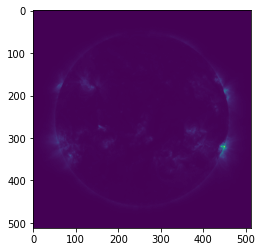

In [9]:
plt.imshow(aia0_img)

In [10]:

# # name of your image file
# filename = './directory/to/image/file/image.tif'

# # open image using PIL
# img = Image.open(filename)

# # convert to numpy array
# img = np.array(img)

# find number of channels
if aia0_img.ndim == 2:
    channels = 1
    print("aia image has 1 channel")
else:
    channels = image.shape[-1]
    print("aia image has", channels, "channels")
    
# if hmi0_img.ndim == 2:
#     channels = 1
#     print("hmi image has 1 channel")
# else:
#     channels = image.shape[-1]
#     print("hmi image has", channels, "channels")

aia image has 1 channel


In [11]:
import shutil

In [12]:
# source = '2011/HMI/bz/'
# dest1 = 'folderA/train/'

# files = [f for f in os.listdir(source)]
# counter = 0
# for file in files:
#   shutil.move(source+file, dest1)
#   counter += 1
# print(counter)

In [13]:
len(os.listdir('folderA/train/'))

7718

In [14]:
sorted(os.listdir('2011/AIA/'))

['.ipynb_checkpoints',
 '0094',
 '0131',
 '0171',
 '0193',
 '0211',
 '0304',
 '0335',
 '1600',
 '1700']

In [18]:
source = '2011/AIA/0304/'
dest1 = 'folderB/train/'

files = [f for f in os.listdir(source)]
counter = 0
for file in files:
  shutil.copy(source+file, dest1)
  counter += 1
print(counter)

7718


In [16]:
# import os
# import glob

# files = glob.glob('folderB/train/*')
# for f in files:
#     os.remove(f)

In [19]:
len(os.listdir('folderB/train/'))

7718

In [22]:
# import os
# import glob

# files = glob.glob('output/train/*')
# for f in files:
#     os.remove(f)

In [23]:
len(os.listdir('output/train/'))

0

7718

In [24]:
import os
import numpy as np
from PIL import Image
import cv2

# define paths for translation from domain A (images in folderA) -> domain B (images in folderB)
folderA = 'folderA'
folderB = 'folderB'
dest_path = 'output'

splits = os.listdir(folderA)

for sp in splits:
    img_fold_A = os.path.join(folderA, sp)
    img_fold_B = os.path.join(folderB, sp)
    hmi_img_list = sorted(os.listdir(img_fold_A))
    aia_img_list = sorted(os.listdir(img_fold_B))
    num_imgs = len(hmi_img_list)
    img_fold_AB = os.path.join(dest_path, sp)
    if not os.path.isdir(img_fold_AB):
        os.makedirs(img_fold_AB)
    print('split = %s, number of images = %d' % (sp, num_imgs))
    for n in range(num_imgs):
        name_A = hmi_img_list[n]
        path_A = os.path.join(img_fold_A, name_A)
        name_B = aia_img_list[n]
        path_B = os.path.join(img_fold_B, name_B)
        if os.path.isfile(path_A) and os.path.isfile(path_B):
            name_AB = f'combined_hmi_aia{n}'   # name_AB = name_A
            path_AB = os.path.join(img_fold_AB, name_AB)
            im_A1 = np.load(path_A)
            im_A1_image = hmi_image_process(im_A1)
            
#             im_A = np.array(im_A1)

            im_B1 = np.load(path_B)
            im_B1_image = aia_image_process(im_B1)
    
#             im_B = np.array(im_B1)

            im_AB_image = np.concatenate([im_A1_image, im_B1_image], 1)
            np.save(path_AB, im_AB_image)

split = train, number of images = 7718
split = .ipynb_checkpoints, number of images = 0


In [25]:
# load all images from the directory into memory with appropriate preprocessing

def load_images(path, size=(256, 512)):
    (src_list, tar_list) = (list(), list())

    # enumerate filenames in directory, assuming all are images
    for filename in listdir(path):

        # load and resize the image
        pixels = np.load(path + '/' + filename)

        # convert to numpy array
        pixels = img_to_array(pixels)

        # split into satellite and map
        (sat_img, map_img) = (pixels[:, :256], pixels[:, 256:])
        src_list.append(sat_img)
        tar_list.append(map_img)
    return [asarray(src_list), asarray(tar_list)]

In [26]:
path = 'output/train'

# load dataset
[src_images, tar_images] = load_images(path)
print ('Loaded: ', src_images.shape, tar_images.shape)

Loaded:  (7718, 256, 256, 1) (7718, 256, 256, 1)


In [27]:
# save as compressed numpy array

filename = 'aia304full2011.npz'
savez_compressed(filename, src_images, tar_images)
print ('Saved dataset: ', filename)

Saved dataset:  aia304full2011.npz
